In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import zipfile
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from scipy.sparse import hstack
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [3]:
train_data = zipfile.ZipFile('G:/Applied_AI/case_study_1/train.csv.zip')
train_data = pd.read_csv(train_data.open('train.csv'),encoding = "ISO-8859-1")

In [4]:
print(train_data.shape)
train_data.head()

(74067, 5)


,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [5]:
unique_product_ids = train_data.product_uid.unique()
print('Unique product ids',len(unique_product_ids))

Unique product ids 54667


Pressure-Treated Timber #2 Southern Yellow Pine (Common: 4 in. x 4 in. x 8 ft.; Actual: 3.56 in. x 3.56 in. x 96 in.)    21
Lithonia Lighting All Season 4 ft. 2-Light Grey T8 Strip Fluorescent Shop Light                                          21
2 in. x 4 in. x 96 in. Premium Kiln-Dried Whitewood Stud                                                                 18
Ryobi ONE+ 18-Volt Lithium-Ion Ultimate Combo Kit (6-Tool)                                                               17
Ryobi ONE+ 18-Volt Lithium-Ion Cordless Drill/Driver and Impact Driver Kit (2-Tool)                                      17
                                                                                                                         ..
Extreme Tools 41 in. Extreme Portable Workstation and 11-Drawer Standard Roller Cabinet Combination, Black                1
Dremel 1-1/8 in. Bi-Metal Flush Cut Blade                                                                                 1
Mueller 

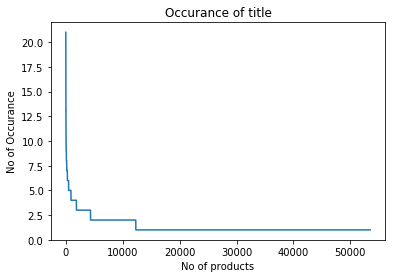

In [6]:
prod_title = train_data['product_title'].value_counts()
print(prod_title)
plt.plot(prod_title.values)
plt.title('Occurance of title')
plt.ylabel('No of Occurance')
plt.xlabel('No of products')
plt.show()


everblit heavy duty canvas dropcloth           16
anderson windows 400 seriesimpact resistant    16
burgundy red foot stools                       16
contact paoer                                  16
1/2 zip wall                                   16
                                               ..
studio dual flush                               1
7w compact flourescent bulb                     1
handycap toilets                                1
4-in x 12-in return grilles                     1
over ran                                        1
Name: search_term, Length: 11795, dtype: int64


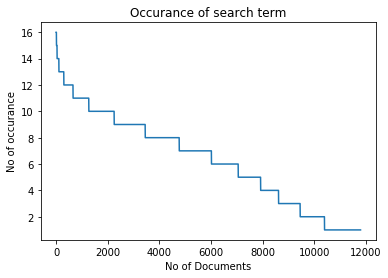

In [7]:
prod_search_query = train_data['search_term'].value_counts()
print(prod_search_query)
plt.plot(prod_search_query.values)
plt.title('Occurance of search term')
plt.ylabel('No of occurance')
plt.xlabel('No of Documents')
plt.show()

3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64


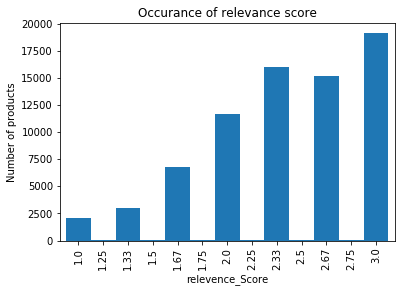

In [8]:
relevence_score = train_data['relevance'].value_counts().sort_index()
print(train_data['relevance'].value_counts())
relevence_score.plot(kind='bar',width=1)
plt.xlabel('relevence_Score')
plt.ylabel('Number of products')
plt.title('Occurance of relevance score')
plt.show()

# Attribute Data

In [9]:
attribute_data = zipfile.ZipFile('G:/Applied_AI/case_study_1/attributes.csv.zip')
attribute_data = pd.read_csv(attribute_data.open('attributes.csv'),encoding = "ISO-8859-1")

In [10]:
print(attribute_data.shape)
attribute_data.head()

(2044803, 3)


,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90Â° connectio...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


195932.0    88
100532.0    80
186482.0    79
119037.0    79
219723.0    78
            ..
179264.0     5
204918.0     5
169844.0     5
171763.0     5
193130.0     5
Name: product_uid, Length: 86263, dtype: int64


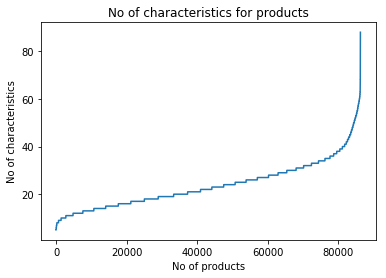

In [12]:
prod_uid_att = attribute_data['product_uid'].value_counts()
print(prod_uid_att)
plt.plot(sorted(prod_uid_att.values))
plt.title('No of characteristics for products')
plt.xlabel('No of products')
plt.ylabel('No of characteristics')
plt.show()

In [14]:
product_descriptions = zipfile.ZipFile('G:/Applied_AI/case_study_1/product_descriptions.csv.zip')
product_descriptions = pd.read_csv(product_descriptions.open('product_descriptions.csv'),encoding = "ISO-8859-1")

In [15]:
print(product_descriptions.shape)
product_descriptions.head()

(124428, 2)


,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


100303    1
107934    1
187761    1
181618    1
183667    1
         ..
105190    1
103143    1
125672    1
123625    1
100401    1
Name: product_uid, Length: 124428, dtype: int64


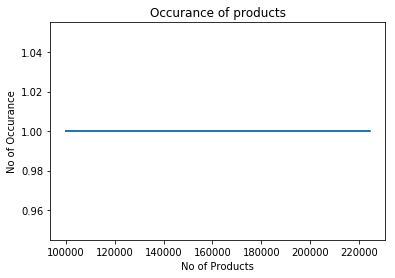

In [16]:
prod_uid_desc = product_descriptions['product_uid'].value_counts()
print(prod_uid_desc)
plt.plot(prod_uid_desc)
plt.xlabel('No of Products')
plt.ylabel('No of Occurance')
plt.title('Occurance of products')
plt.show()

In [17]:
pro_desc = product_descriptions['product_description'][:5].values
pro_desc

array(['Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a "Z" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws',
       'BEHR Premium Textured DECKOVER is an innovative solid color coating. It will bring your old, weathered wood or concrete back to life. 

In [18]:
new_datafame = pd.DataFrame()
new_datafame = train_data

In [19]:
new_datafame

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67
...,...,...,...,...,...
74062,221457,206638,Atlantic Windowpane 576 CD or 192 DVD Blu-Ray ...,tv riser glass,1.00
74063,221458,206639,Philips 40-Watt Halogen R20 Flood Light Bulb (...,r20 halogen light,3.00
74064,221463,206641,Schlage Camelot In-Active Aged Bronze Handlese...,schlage lock siena half dummy knob with,2.33
74065,221471,206648,Plastec 11 in. x 24 in. Rose Garden Wall Decor...,zen garden decor,3.00


## new_data = Train data + Attribute data

In [20]:
new_datafame = new_datafame.merge(attribute_data,on='product_uid',how='left')

In [21]:
new_datafame

,id,product_uid,product_title,search_term,relevance,name,value
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet01,Versatile connector for various 90Â° connectio...
1,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet02,Stronger than angled nailing or screw fastenin...
2,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet03,Help ensure joints are consistently straight a...
3,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet05,Made from 12-Gauge steel
...,...,...,...,...,...,...,...
1428147,221473,206650,LICHTENBERG Pool Blue No. 918 Millennial Ryan ...,fine sheer curtain 63 inches,2.33,Product Weight (lb.),0.66
1428148,221473,206650,LICHTENBERG Pool Blue No. 918 Millennial Ryan ...,fine sheer curtain 63 inches,2.33,Product Width (in.),40
1428149,221473,206650,LICHTENBERG Pool Blue No. 918 Millennial Ryan ...,fine sheer curtain 63 inches,2.33,Width (in) x Length (in),40 x 63
1428150,221473,206650,LICHTENBERG Pool Blue No. 918 Millennial Ryan ...,fine sheer curtain 63 inches,2.33,Window Treatment Product Type,Drapery Panel


## new_data + product_description

In [22]:
new_datafame = new_datafame.merge(product_descriptions,on='product_uid',how='left')

In [23]:
new_datafame

,id,product_uid,product_title,search_term,relevance,name,value,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet01,Versatile connector for various 90Â° connectio...,"Not only do angles make joints stronger, they ..."
1,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet02,Stronger than angled nailing or screw fastenin...,"Not only do angles make joints stronger, they ..."
2,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet03,Help ensure joints are consistently straight a...,"Not only do angles make joints stronger, they ..."
3,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.,"Not only do angles make joints stronger, they ..."
4,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet05,Made from 12-Gauge steel,"Not only do angles make joints stronger, they ..."
...,...,...,...,...,...,...,...,...
1428147,221473,206650,LICHTENBERG Pool Blue No. 918 Millennial Ryan ...,fine sheer curtain 63 inches,2.33,Product Weight (lb.),0.66,No. 918 Millennial Ryan heathered texture semi...
1428148,221473,206650,LICHTENBERG Pool Blue No. 918 Millennial Ryan ...,fine sheer curtain 63 inches,2.33,Product Width (in.),40,No. 918 Millennial Ryan heathered texture semi...
1428149,221473,206650,LICHTENBERG Pool Blue No. 918 Millennial Ryan ...,fine sheer curtain 63 inches,2.33,Width (in) x Length (in),40 x 63,No. 918 Millennial Ryan heathered texture semi...
1428150,221473,206650,LICHTENBERG Pool Blue No. 918 Millennial Ryan ...,fine sheer curtain 63 inches,2.33,Window Treatment Product Type,Drapery Panel,No. 918 Millennial Ryan heathered texture semi...


In [24]:
new_datafame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428152 entries, 0 to 1428151
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   id                   1428152 non-null  int64  
 1   product_uid          1428152 non-null  int64  
 2   product_title        1428152 non-null  object 
 3   search_term          1428152 non-null  object 
 4   relevance            1428152 non-null  float64
 5   name                 1410632 non-null  object 
 6   value                1409332 non-null  object 
 7   product_description  1428152 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 98.1+ MB


In [25]:
new_datafame.isnull().sum()

id                         0
product_uid                0
product_title              0
search_term                0
relevance                  0
name                   17520
value                  18820
product_description        0
dtype: int64

In [26]:
data=new_datafame.drop_duplicates(subset="product_uid")

In [27]:
data

,id,product_uid,product_title,search_term,relevance,name,value,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet01,Versatile connector for various 90Â° connectio...,"Not only do angles make joints stronger, they ..."
30,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,Application Method,"Brush,Roller,Spray",BEHR Premium Textured DECKOVER is an innovativ...
65,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Bath Faucet Type,Combo Tub and Shower,Update your bathroom with the Delta Vero Singl...
115,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00,Appliance Type,Over the Range Microwave,Achieving delicious results is almost effortle...
259,23,100007,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67,Battery Power Type,Ni-Cad,The Quantum Adjustable 2-Light LED Black Emerg...
...,...,...,...,...,...,...,...,...
1427992,221457,206638,Atlantic Windowpane 576 CD or 192 DVD Blu-Ray ...,tv riser glass,1.00,Assembled Depth (in.),9.5 in,"Atlantic, Inc. 94835722 Uniquely designed for ..."
1428026,221458,206639,Philips 40-Watt Halogen R20 Flood Light Bulb (...,r20 halogen light,3.00,Actual Color Temperature (K),2700,Philips Energy Advantage lamps use less energy...
1428057,221463,206641,Schlage Camelot In-Active Aged Bronze Handlese...,schlage lock siena half dummy knob with,2.33,Application Type,Entry,The Schlage Camelot In-Active Aged Bronze Hand...
1428105,221471,206648,Plastec 11 in. x 24 in. Rose Garden Wall Decor...,zen garden decor,3.00,Bullet01,Indoor and outdoor use,The Rose Garden is inspired by the popular ear...


In [28]:
data.isnull().sum()

id                         0
product_uid                0
product_title              0
search_term                0
relevance                  0
name                   16263
value                  16276
product_description        0
dtype: int64

In [29]:
data = data.replace(np.nan,'',regex=True)

In [30]:
data

,id,product_uid,product_title,search_term,relevance,name,value,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet01,Versatile connector for various 90Â° connectio...,"Not only do angles make joints stronger, they ..."
30,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,Application Method,"Brush,Roller,Spray",BEHR Premium Textured DECKOVER is an innovativ...
65,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Bath Faucet Type,Combo Tub and Shower,Update your bathroom with the Delta Vero Singl...
115,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00,Appliance Type,Over the Range Microwave,Achieving delicious results is almost effortle...
259,23,100007,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67,Battery Power Type,Ni-Cad,The Quantum Adjustable 2-Light LED Black Emerg...
...,...,...,...,...,...,...,...,...
1427992,221457,206638,Atlantic Windowpane 576 CD or 192 DVD Blu-Ray ...,tv riser glass,1.00,Assembled Depth (in.),9.5 in,"Atlantic, Inc. 94835722 Uniquely designed for ..."
1428026,221458,206639,Philips 40-Watt Halogen R20 Flood Light Bulb (...,r20 halogen light,3.00,Actual Color Temperature (K),2700,Philips Energy Advantage lamps use less energy...
1428057,221463,206641,Schlage Camelot In-Active Aged Bronze Handlese...,schlage lock siena half dummy knob with,2.33,Application Type,Entry,The Schlage Camelot In-Active Aged Bronze Hand...
1428105,221471,206648,Plastec 11 in. x 24 in. Rose Garden Wall Decor...,zen garden decor,3.00,Bullet01,Indoor and outdoor use,The Rose Garden is inspired by the popular ear...


In [33]:
y = data['relevance']
x = data.drop(['id','relevance'],axis=1)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True,stratify=y)

In [35]:
print('X_train :',X_train.shape)
print('Y_train :',y_train.shape)
print('X_test :',X_test.shape)
print('Y_test :',y_test.shape)

X_train : (38266, 6)
Y_train : (38266,)
X_test : (16401, 6)
Y_test : (16401,)


* Product title

In [36]:
vectorizer_title=TfidfVectorizer(min_df=1,ngram_range=(1,4),max_features=5000)
vectorizer_title.fit(X_train['product_title'].values)
feature_1_title=list(vectorizer_title.get_feature_names())

X_train_title =vectorizer_title.transform(X_train['product_title'].values)
X_test_title =vectorizer_title.transform(X_test['product_title'].values)
print(X_train_title.shape)
print(X_test_title.shape)

(38266, 5000)
(16401, 5000)


* Search Term

In [37]:
vectorizer_search_term=TfidfVectorizer(min_df=1,ngram_range=(1,4),max_features=5000)
vectorizer_search_term.fit(X_train['search_term'].values)
feature_search_term=list(vectorizer_search_term.get_feature_names())

X_train_search_term =vectorizer_search_term.transform(X_train['search_term'].values)
X_test_search_term =vectorizer_search_term.transform(X_test['search_term'].values)
print(X_train_search_term.shape)
print(X_test_search_term.shape)

(38266, 5000)
(16401, 5000)


* Name

In [38]:
vectorizer_name = TfidfVectorizer(min_df=1,ngram_range=(1,4),max_features=5000)
vectorizer_name.fit(X_train['name'].values)
feature_name = list(vectorizer_name.get_feature_names())

X_train_name =vectorizer_name.transform(X_train['name'].values)
X_test_name =vectorizer_name.transform(X_test['name'].values)
print(X_train_name.shape)
print(X_test_name.shape)


(38266, 1137)
(16401, 1137)


* Value

In [39]:
vectorizer_value = TfidfVectorizer(min_df=1,ngram_range=(1,4),max_features=5000)
vectorizer_value.fit(X_train['value'].values)
feature_value = list(vectorizer_value.get_feature_names())

X_train_value =vectorizer_value.transform(X_train['value'].values)
X_test_value =vectorizer_value.transform(X_test['value'].values)
print(X_train_value.shape)
print(X_test_value.shape)


(38266, 5000)
(16401, 5000)


* Description

In [40]:
vectorizer_descrip = TfidfVectorizer(min_df=1,ngram_range=(1,4),max_features=5000)
vectorizer_descrip.fit(X_train['product_description'].values)
feature_descrip = list(vectorizer_descrip.get_feature_names())

X_train_descrip =vectorizer_descrip.transform(X_train['product_description'].values)
X_test_descrip =vectorizer_descrip.transform(X_test['product_description'].values)
print(X_train_descrip.shape)
print(X_test_descrip.shape)


(38266, 5000)
(16401, 5000)


In [41]:
X_train_tfidf = hstack((X_train_title,X_train_search_term,X_train_value,X_train_name,X_train_descrip)).tocsr()

In [42]:
X_test_tfidf = hstack((X_test_title,X_test_search_term,X_test_value,X_test_name,X_test_descrip)).tocsr()

In [43]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(38266, 21137)
(16401, 21137)


In [44]:
print(y_train.shape)
print(y_test.shape)

(38266,)
(16401,)


## Ridge

In [46]:
rg= Ridge()
rg.fit(X_train_tfidf, y_train)
y_pred_rd = rg.predict(X_test_tfidf)
rg_mse = mean_squared_error(y_pred_rd, y_test)
rg_rmse = np.sqrt(rg_mse)
print('Ridge RMSE: %.4f' % rg_rmse)

Ridge RMSE: 0.5219


## Random Forest

In [48]:
random_forest = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=0)
random_forest.fit(X_train_tfidf, y_train)
y_pred_rf = random_forest.predict(X_test_tfidf)
rf_mse_ = mean_squared_error(y_pred_rf, y_test)
rf_rmse_ = np.sqrt(rf_mse_)
print('RandomForest RMSE: %.4f' % rf_rmse_)

RandomForest RMSE: 0.5244


## GBDT

In [49]:
gbt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
gbt.fit(X_train_tfidf, y_train)
y_pred_gbdt = gbt.predict(X_test_tfidf)
est_mse = mean_squared_error(y_pred_gbdt, y_test)
est_rmse = np.sqrt(est_mse)
print('Gradient boosting RMSE: %.4f' % est_rmse)

Gradient boosting RMSE: 0.5264


## XGBoost

In [50]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=7)
xgb.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb.predict(X_test_tfidf)
xgb_mse = mean_squared_error(y_pred_xgb, y_test)
xgb_rmse = np.sqrt(xgb_mse)
print('Xgboost RMSE: %.4f' % xgb_rmse)

Xgboost RMSE: 0.5144


In [51]:
from prettytable import PrettyTable

In [53]:
my_table = PrettyTable(['Model','RMSE'])
my_table.add_row(['Ridge','0.5219'])
my_table.add_row(['XGboost','0.5144'])
my_table.add_row(['Random Forest','0.5244'])
my_table.add_row(['GBDT','0.5264'])
print(my_table)

+---------------+--------+
|     Model     |  RMSE  |
+---------------+--------+
|     Ridge     | 0.5219 |
|    XGboost    | 0.5144 |
| Random Forest | 0.5244 |
|      GBDT     | 0.5264 |
+---------------+--------+
